### Base Imports

In [3]:
# for data analysis 
import numpy as np
import pandas as pd
# from scipy import ... 
# from sklearn import ...

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns
sns.set() # use seaborn defaults

# https://github.com/jgillick/LendingClub

### Set Options

In [26]:
# display options
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [27]:
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load & Survey Data

In [6]:
# df = pd.read_csv("LoanStats_2017Q4.csv", header=1, low_memory=False)
# collisions = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv", low_memory=False)

four_train = pd.read_json("foursquare_train_hard.json")
locu_train = pd.read_json("locu_train_hard.json")    

four_test = pd.read_json("foursquare_test_hard.json")
locu_test = pd.read_json("locu_test_hard.json")

matches_train = pd.read_csv("matches_train_hard.csv")

(600, 11)

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,4f328ea619836c91c7e3714a,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,(212) 678-4680,NaN,NY,800 Columbus Ave.,NaN
1,United States,4c37b5f6ae2da593a56affc5,40.760460,New York,-73.994920,West Side Steakhouse,(212) 564-4803,10036,NY,597 10th Ave.,NaN
2,United States,4b41060df964a52098bf25e3,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,(212) 582-7380,10019,NY,732 7th Ave.,NaN
3,United States,3fd66200f964a520ece41ee3,40.708660,New York,-74.011263,Suspenders,(212) 732-5005,10006,NY,111 Broadway,http://www.suspendersnyc.com
4,United States,52064aab11d284f64d088329,40.718105,New York,-73.996096,Grand Century Cafe,None,NaN,NY,NaN,NaN


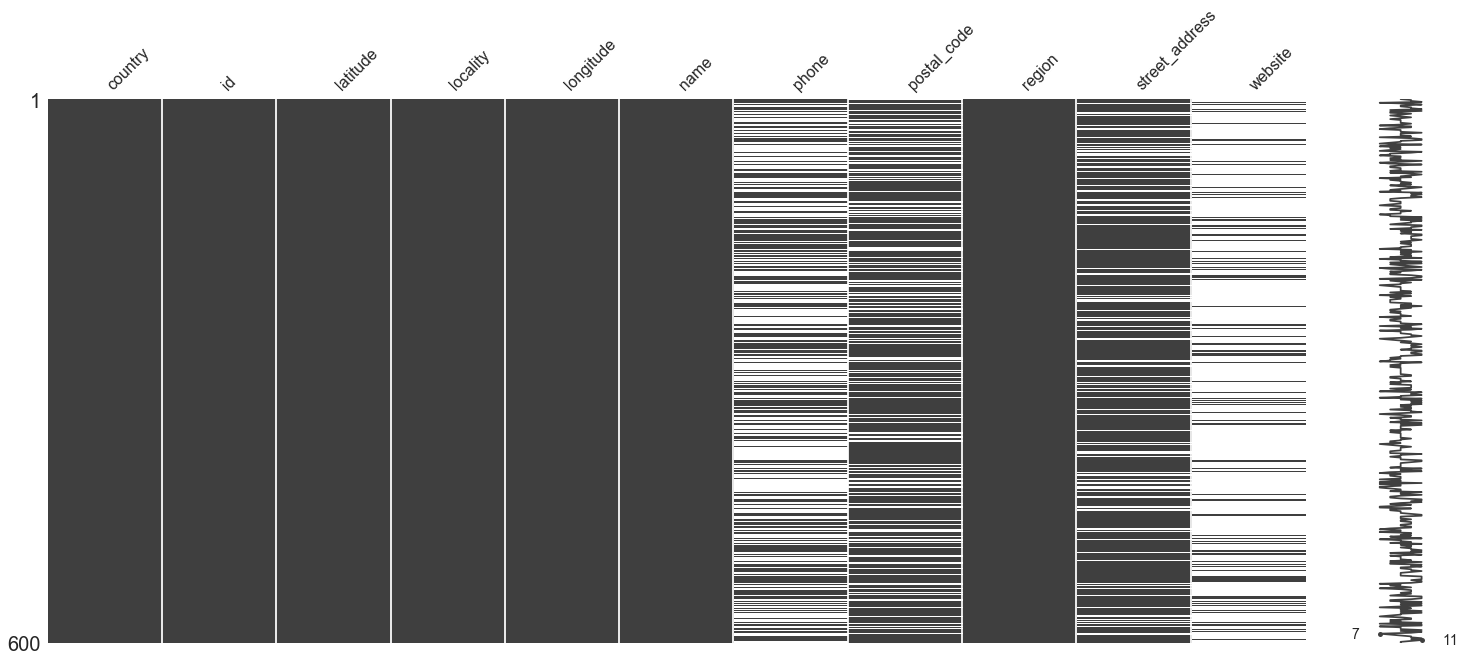

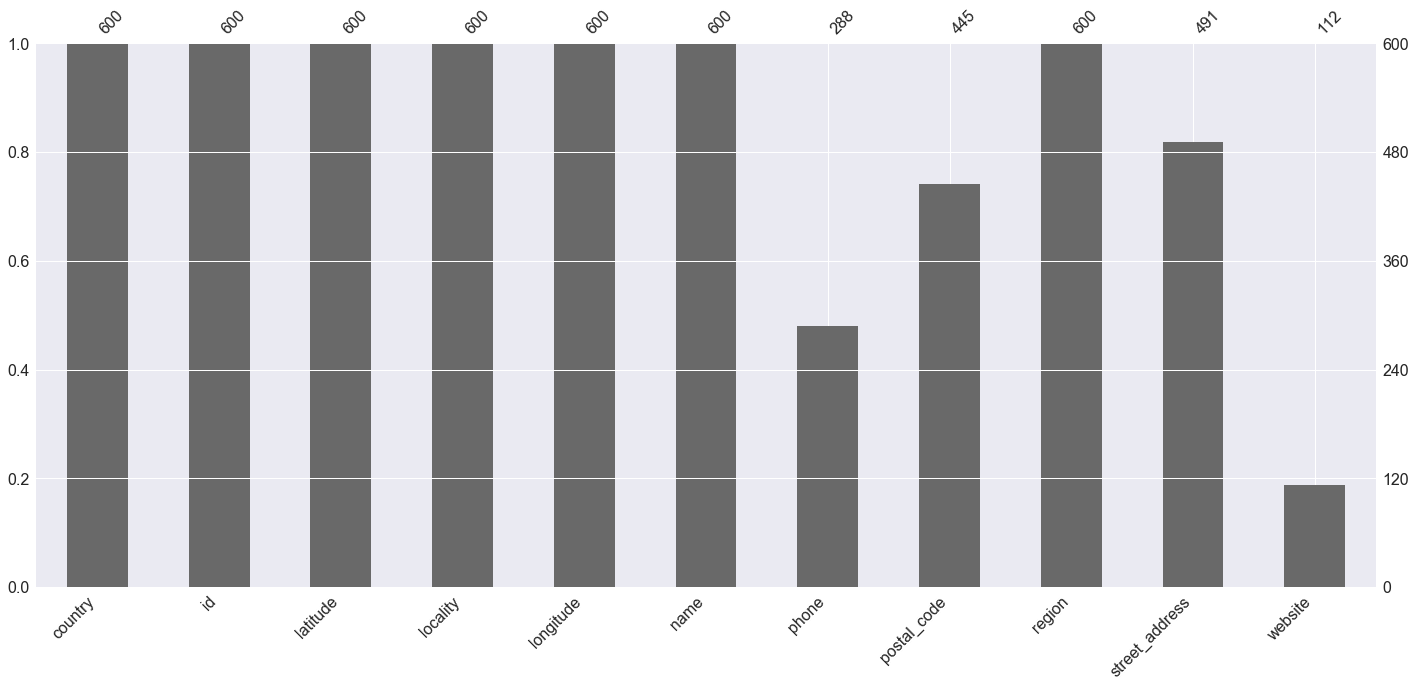

In [7]:
four_train.shape
four_train = four_train.replace("", np.nan)
four_train.head()

_ = msno.matrix(four_train)
_ = msno.bar(four_train)

(600, 11)

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,Chipotle Mexican Grill,2126736904,10010,NY,125 East 23rd St.,http://www.chipotle.com/
1,United States,81df045e563fb6cab7f7,40.810765,New York,-73.952591,Honey Salon Inc,2126630100,10026,NY,174 Saint Nicholas Ave.,NaN
2,United States,b265cf6c80121211dbfc,40.743580,New York,-73.986127,Palatte,6464763812,10016,NY,66 Madison Ave.,http://www.palattenyc.com/
3,United States,4fc50abefae5311cc2b3,40.828820,New York,-73.949022,Best Taste Restaurant,2122815691,10031,NY,3609 Broadway,NaN
4,United States,72560dc41f1b7aed0d47,40.749936,New York,-73.983849,Integra Hair System Inc,2125636786,10018,NY,11 W. 36th St. # 3,http://www.integrahair.com/


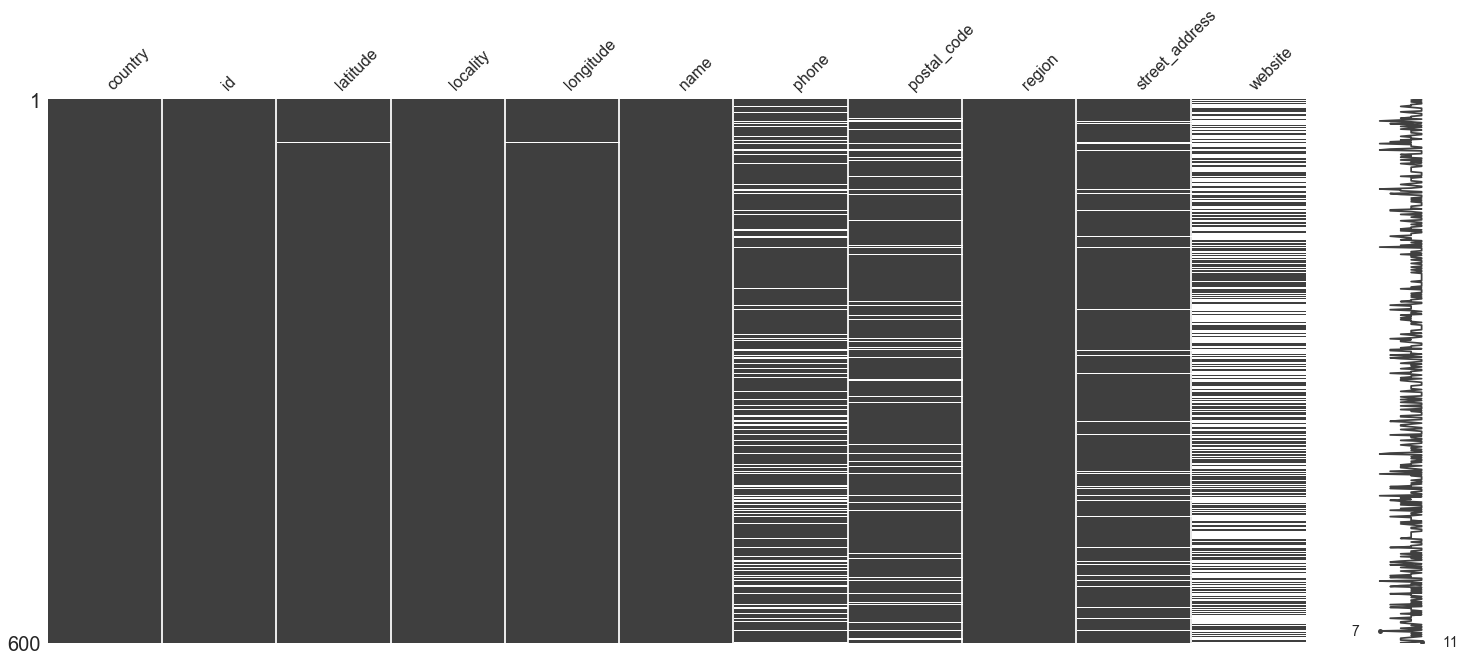

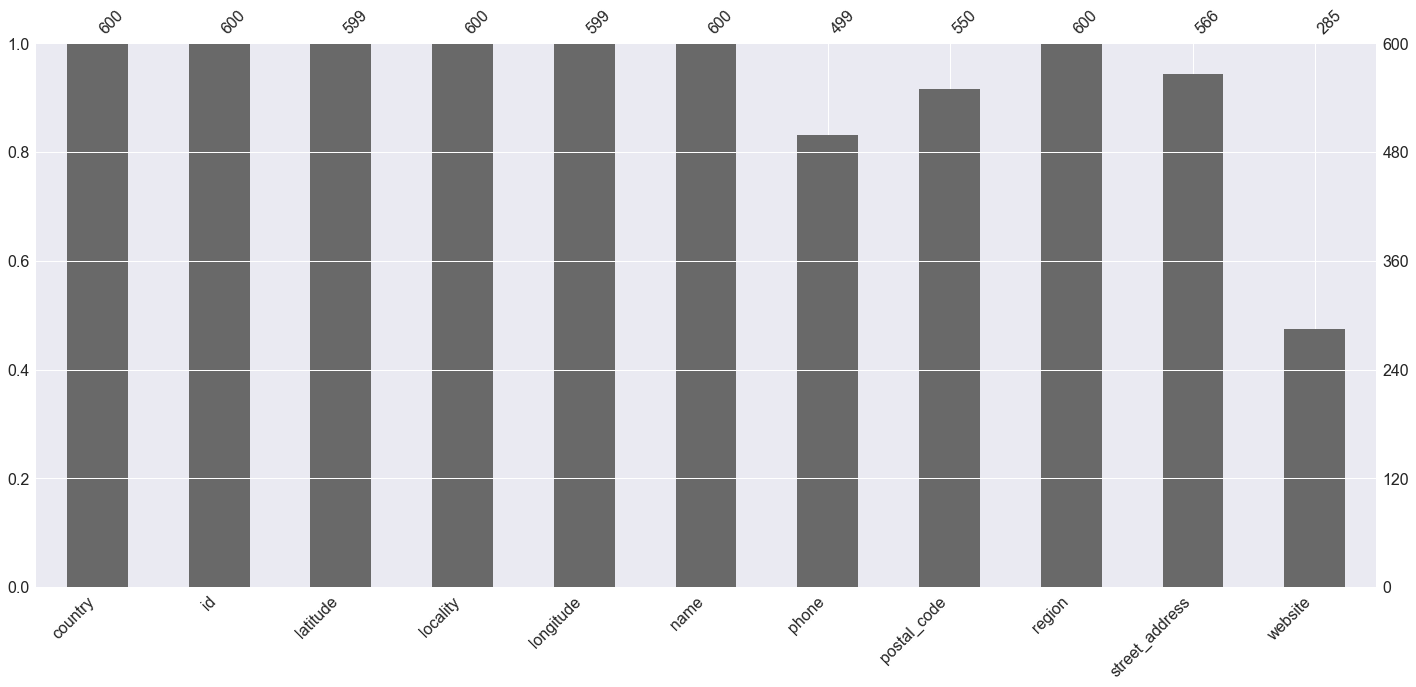

In [8]:
locu_train.shape
locu_train = locu_train.replace("", np.nan)
locu_train.head()

_ = msno.matrix(locu_train)
_ = msno.bar(locu_train)

(400, 11)

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,4eefac5cb8f76a24a7b12202,40.732820,New York,-73.998113,Sticky's Finger Joint,(212) 777-7131,10011,NY,31 W. 8th St.,NaN
1,United States,4fb6aeabe4b02861a894f317,40.769622,New York,-73.964026,Café 7,None,10021,NY,725 Park Ave. 7th Floor,NaN
2,United States,4f1227d9e4b03856f12a915d,40.722477,New York,-73.994903,232 Mott,None,10012,NY,232 Mott St.,NaN
3,United States,51ddfccf498eefb41d65b1f1,40.757635,New York,-73.985828,"Hard Rock Cafe,New York",None,NaN,NY,NaN,NaN
4,United States,4d71199c783f8cfa4efae1d6,40.713705,New York,-73.990162,Lo Mein/Noodles Cart,None,NaN,NY,Rutgers St.,NaN


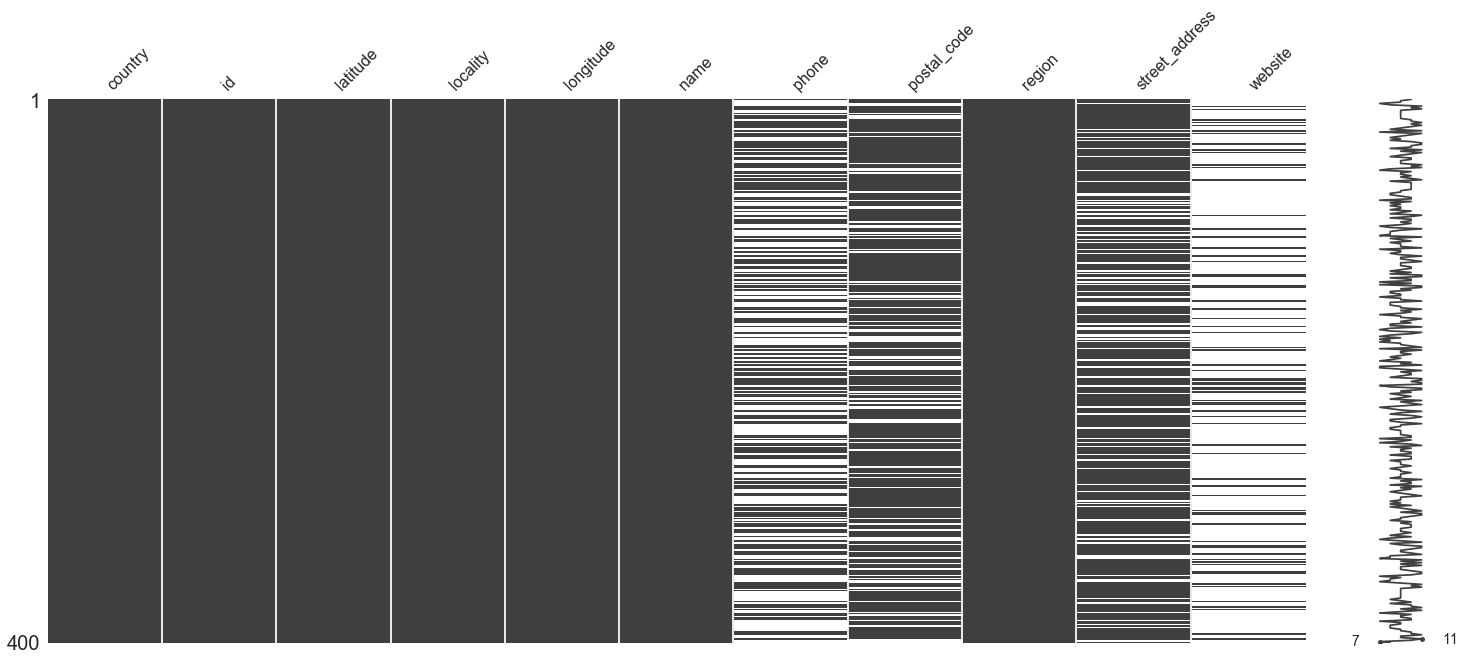

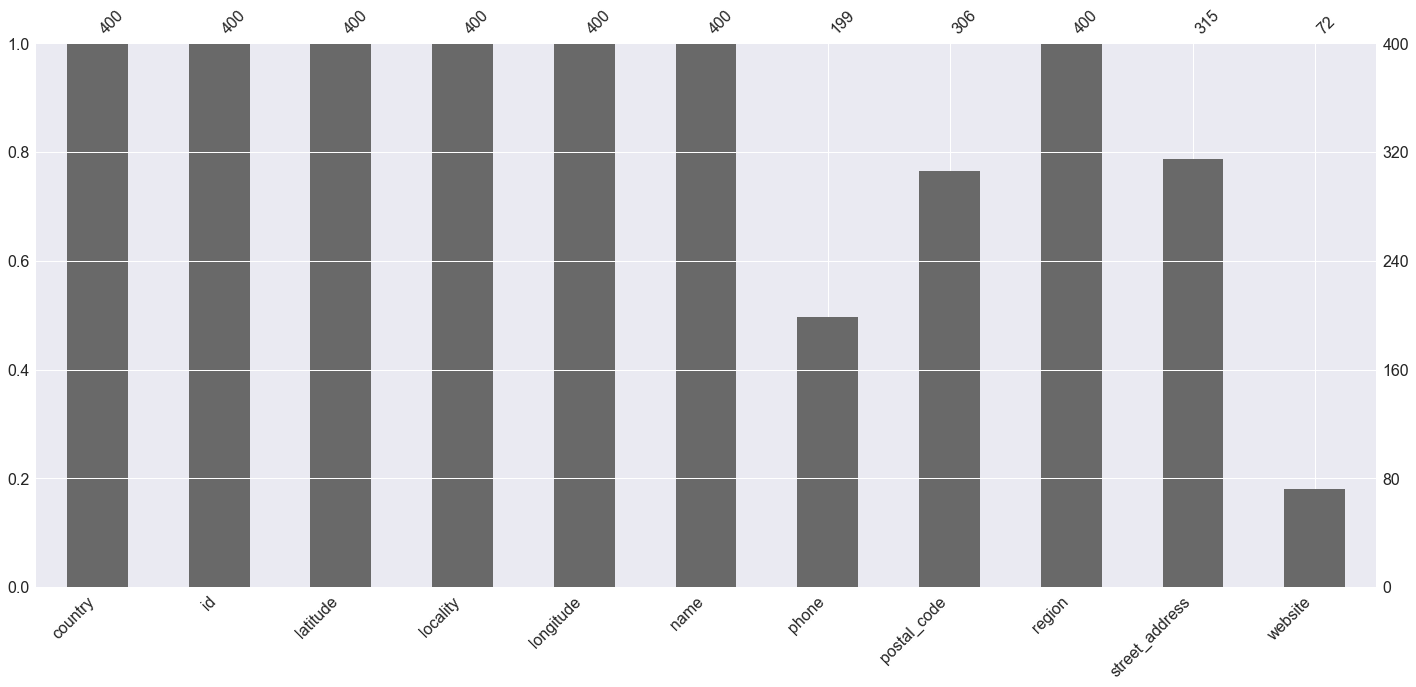

In [9]:
four_test.shape
four_test = four_test.replace("", np.nan)
four_test.head()

_ = msno.matrix(four_test)
_ = msno.bar(four_test)

(400, 11)

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,Panda Restaurant,2126950836,10036,NY,570 9th Ave.,http://pandarg.com/
1,United States,95ad783fd1c65bb8fdbf,40.721025,New York,-73.982903,El Maguey y la Tuna,2124733919,10002,NY,321 East Houston St.,http://www.elmagueyylatunamex.com
2,United States,5060d123ccad77923b20,40.725772,New York,-73.991947,Hair Date Salon/ Professionals Hair Cut,2122288381,10003,NY,329 Bowery,http://www.hairdatenyc.com/
3,United States,9dd6f6b177096efd5da4,40.802047,New York,-73.936988,Pizza Plus Inc,2122890005,10035,NY,2253 3rd Ave. # 1,http://www.pizzaplusmore.com/
4,United States,4773c30d2df4368c0d09,40.725190,New York,-73.992547,Double Crown,2122540350,10012,NY,316 Bowery,http://doublecrown-nyc.com


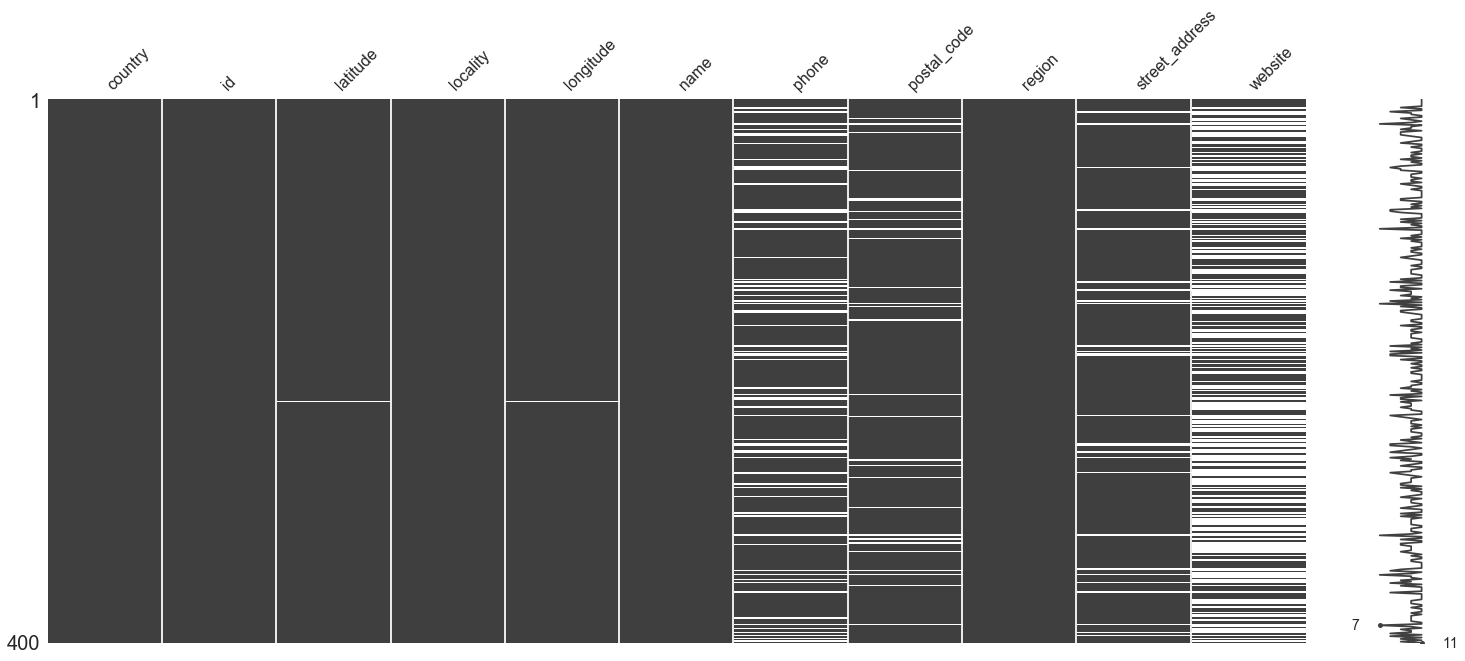

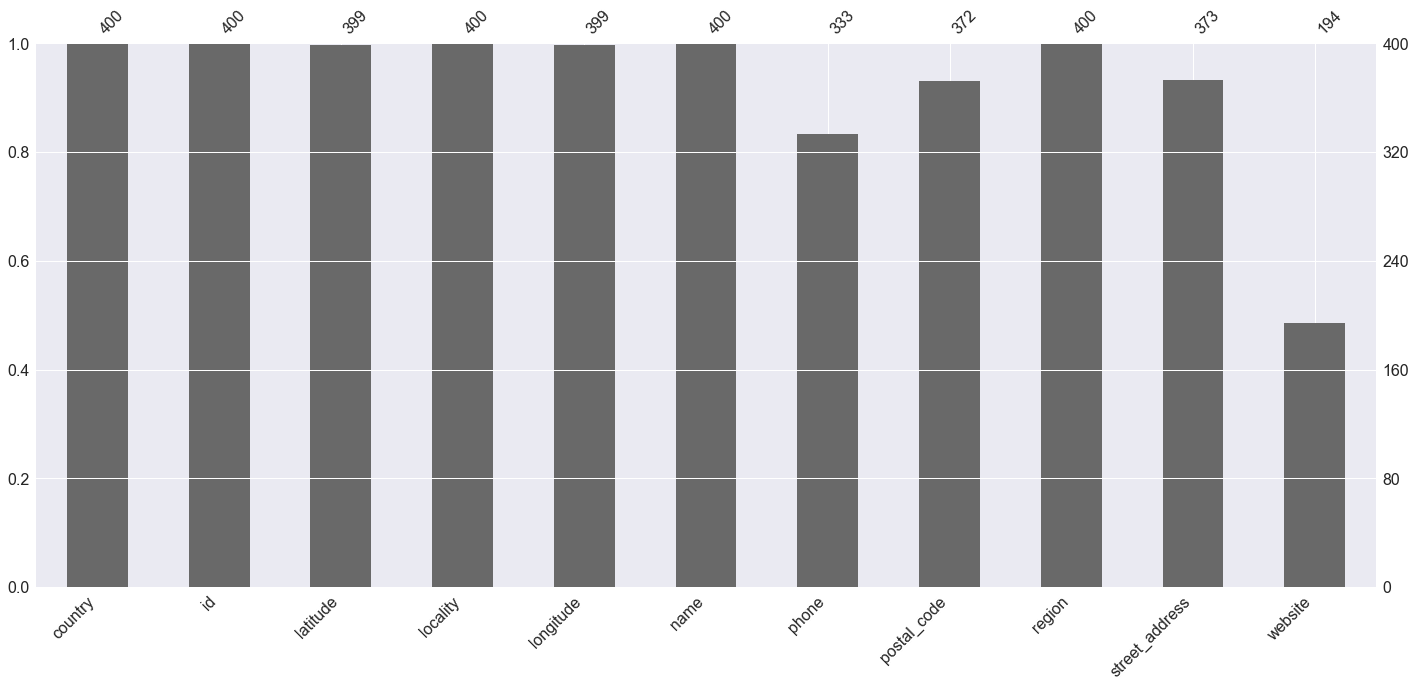

In [10]:
locu_test.shape
locu_test = locu_test.replace("", np.nan)
locu_test.head()

_ = msno.matrix(locu_test)
_ = msno.bar(locu_test)

In [11]:
matches_train.shape
matches_train.head()
matches_train.tail()

(360, 2)

,locu_id,foursquare_id
0,1dae3a8f02f730c3528d,4b694c01f964a520139e2be3
1,219c994dcc53f891ec26,506b6162e4b02bda7fc846ee
2,e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10
3,cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60
4,be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3


,locu_id,foursquare_id
355,7f9925a07041b6aafe29,4f322d3619836c91c7bdb31c
356,f41a0a1b4ed436983efd,49d10756f964a520535b1fe3
357,a4253bcd41f42380cc73,4a53cdc5f964a520bfb21fe3
358,9c17809b4cc91216878b,4e343ba652b11c74622b6643
359,501e881785633247e7e3,51d4fdea498eef3555473a4d


In [12]:
locu_train.loc[locu_train['id'] == "501e881785633247e7e3"]

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
61,United States,501e881785633247e7e3,40.718578,New York,-73.960793,The Plank,NaN,11211,NY,216 Bedford Ave.,NaN


In [13]:
four_train.loc[four_train['id'] == "51d4fdea498eef3555473a4d"]

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
51,United States,51d4fdea498eef3555473a4d,40.718578,New York,-73.960793,The Plank,None,NaN,NY,216 Bedford Ave.,NaN


In [14]:
import Levenshtein

In [16]:
Levenshtein.distance('helowrld', 'hello world')
Levenshtein.ratio('helowrld', 'hello world')

3

0.8421052631578947

In [17]:
from sklearn.metrics import f1_score

In [18]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

f1_score(y_true, y_pred, average='macro')  
f1_score(y_true, y_pred, average='micro')  
f1_score(y_true, y_pred, average='weighted')  
f1_score(y_true, y_pred, average=None)

0.26666666666666666

0.33333333333333331

0.26666666666666666

array([ 0.8,  0. ,  0. ])

In [19]:
matches_test = pd.DataFrame({'locu_id': locu_test["id"], 'foursquare_id': four_test["id"]})
matches_test[['locu_id', 'foursquare_id']].to_csv('matches_test.csv', index=False)

In [20]:
def get_matches(locu_train_path, foursquare_train_path, matches_train_path, locu_test_path, foursquare_test_path):
    return

In [45]:
# https://dedupe.readthedocs.io/en/latest/How-it-works.html
# Can we make these two (Record Linkage) assumptions:
# (A) two records can only refer to the same entity if they are from different datasets
# (B) no other record can match either of those two records.

# https://github.com/dedupeio/rlr
# https://recordlinkage.readthedocs.io/en/latest/about.html
from sklearn.linear_model import LogisticRegression
import recordlinkage

In [56]:
from recordlinkage.datasets import load_febrl4

dfA, dfB = load_febrl4()

dfA.shape
dfA.head()

dfB.shape
dfB.head()


(5000, 10)

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102
rec-3585-org,mikayla,malloney,37,randwick road,avalind,hoppers crossing,4552,vic,19860208,7207688


(5000, 10)

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-561-dup-0,elton,NaN,3,light setreet,pinehill,windermere,3212,vic,19651013,1551941
rec-2642-dup-0,mitchell,maxon,47,edkins street,lochaoair,north ryde,3355,nsw,19390212,8859999
rec-608-dup-0,NaN,white,72,lambrigg street,kelgoola,broadbeach waters,3159,vic,19620216,9731855
rec-3239-dup-0,elk i,menzies,1,lyster place,NaN,northwood,2585,vic,19980624,4970481
rec-2886-dup-0,NaN,garanggar,NaN,may maxwell crescent,springettst arcade,forest hill,2342,vic,19921016,1366884


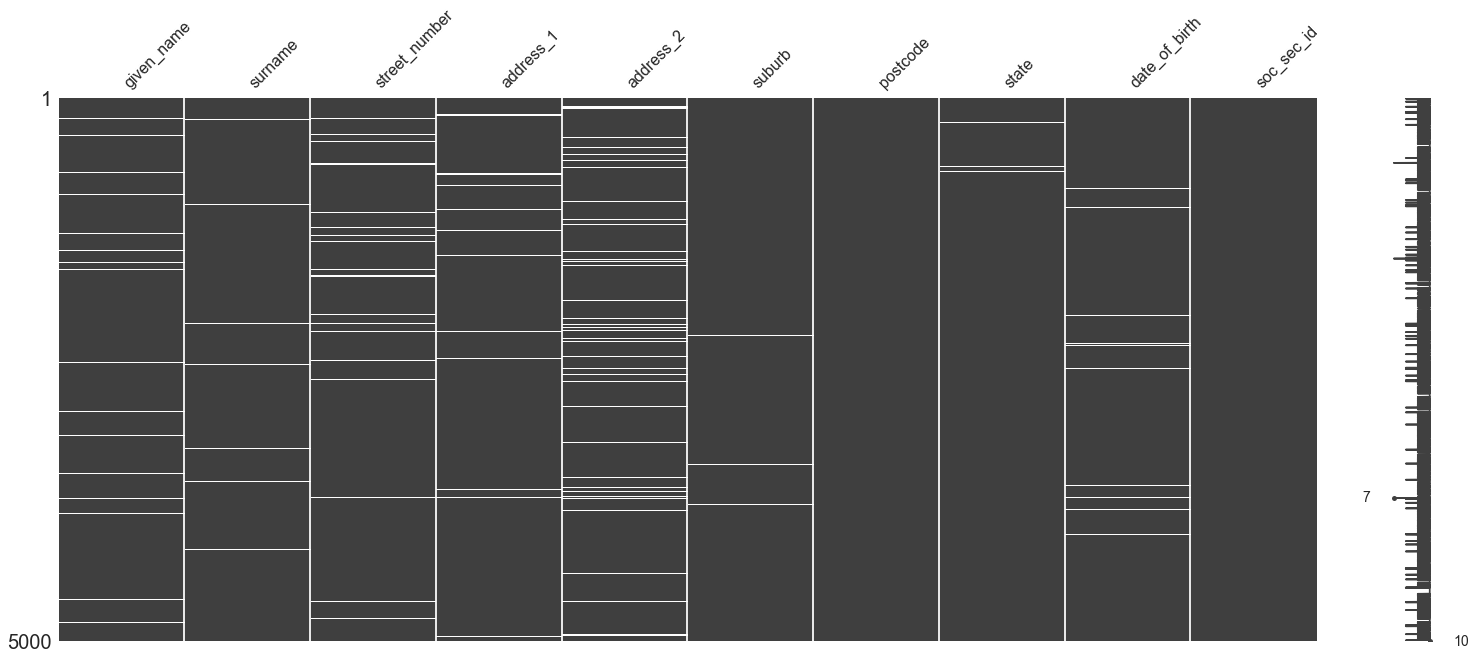

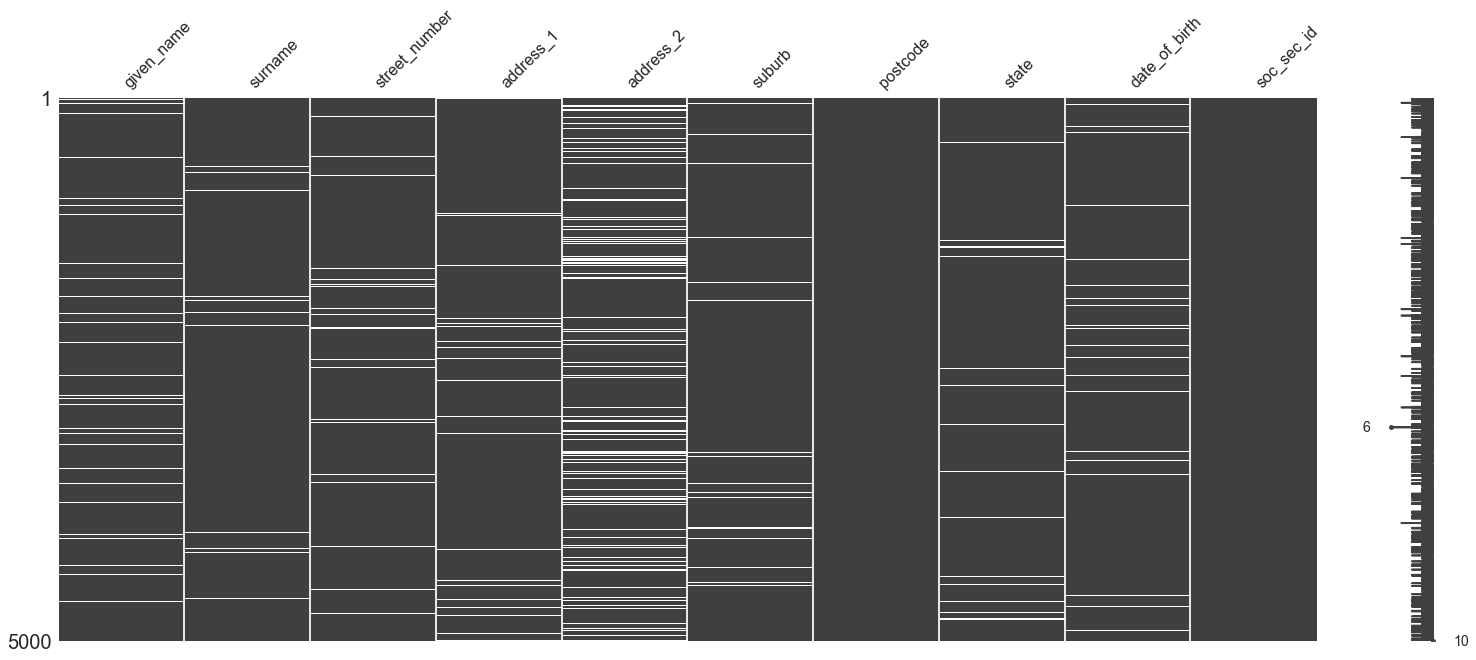

In [58]:
_ = msno.matrix(dfA)
_ = msno.matrix(dfB)

In [62]:
four_train = four_train.replace(np.nan, 0)
four_train.head()

locu_train = locu_train.replace(np.nan, 0)
locu_train.head()

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,4f328ea619836c91c7e3714a,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,(212) 678-4680,0,NY,800 Columbus Ave.,0
1,United States,4c37b5f6ae2da593a56affc5,40.760460,New York,-73.994920,West Side Steakhouse,(212) 564-4803,10036,NY,597 10th Ave.,0
2,United States,4b41060df964a52098bf25e3,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,(212) 582-7380,10019,NY,732 7th Ave.,0
3,United States,3fd66200f964a520ece41ee3,40.708660,New York,-74.011263,Suspenders,(212) 732-5005,10006,NY,111 Broadway,http://www.suspendersnyc.com
4,United States,52064aab11d284f64d088329,40.718105,New York,-73.996096,Grand Century Cafe,0,0,NY,0,0


,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,Chipotle Mexican Grill,2126736904,10010,NY,125 East 23rd St.,http://www.chipotle.com/
1,United States,81df045e563fb6cab7f7,40.810765,New York,-73.952591,Honey Salon Inc,2126630100,10026,NY,174 Saint Nicholas Ave.,0
2,United States,b265cf6c80121211dbfc,40.743580,New York,-73.986127,Palatte,6464763812,10016,NY,66 Madison Ave.,http://www.palattenyc.com/
3,United States,4fc50abefae5311cc2b3,40.828820,New York,-73.949022,Best Taste Restaurant,2122815691,10031,NY,3609 Broadway,0
4,United States,72560dc41f1b7aed0d47,40.749936,New York,-73.983849,Integra Hair System Inc,2125636786,10018,NY,11 W. 36th St. # 3,http://www.integrahair.com/


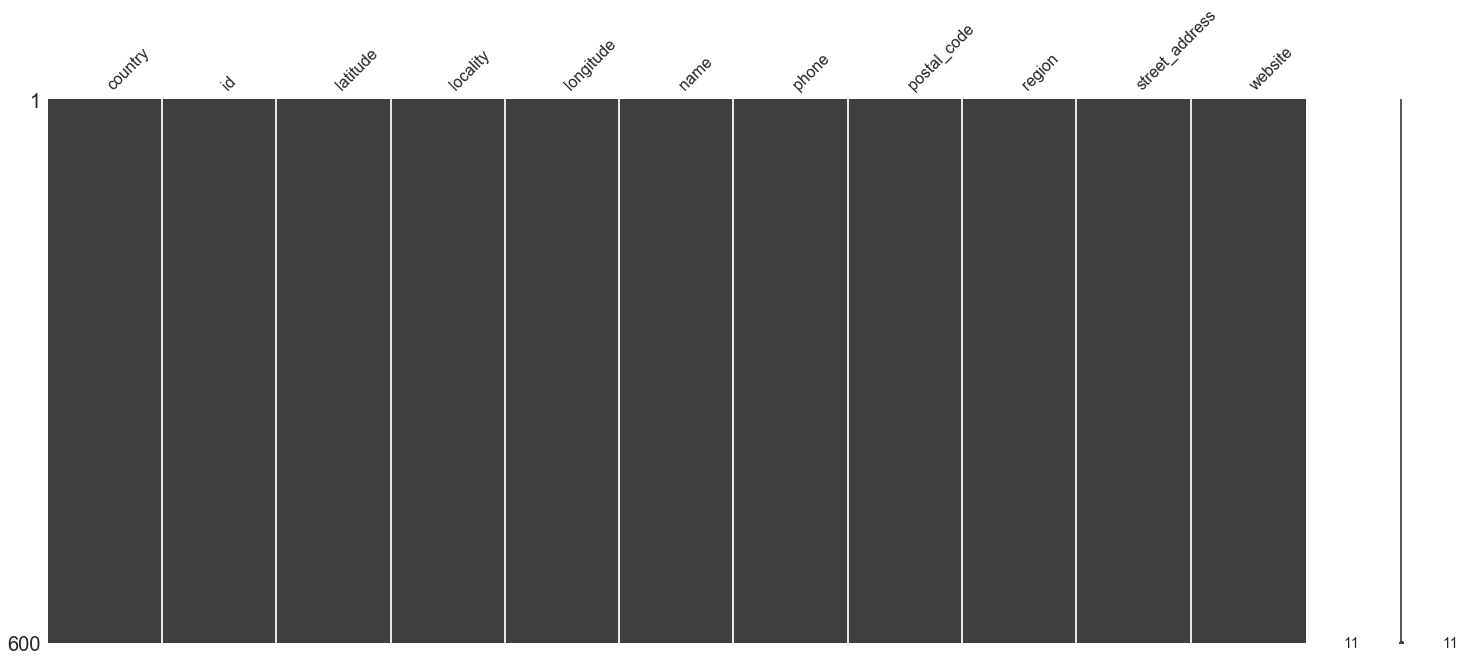

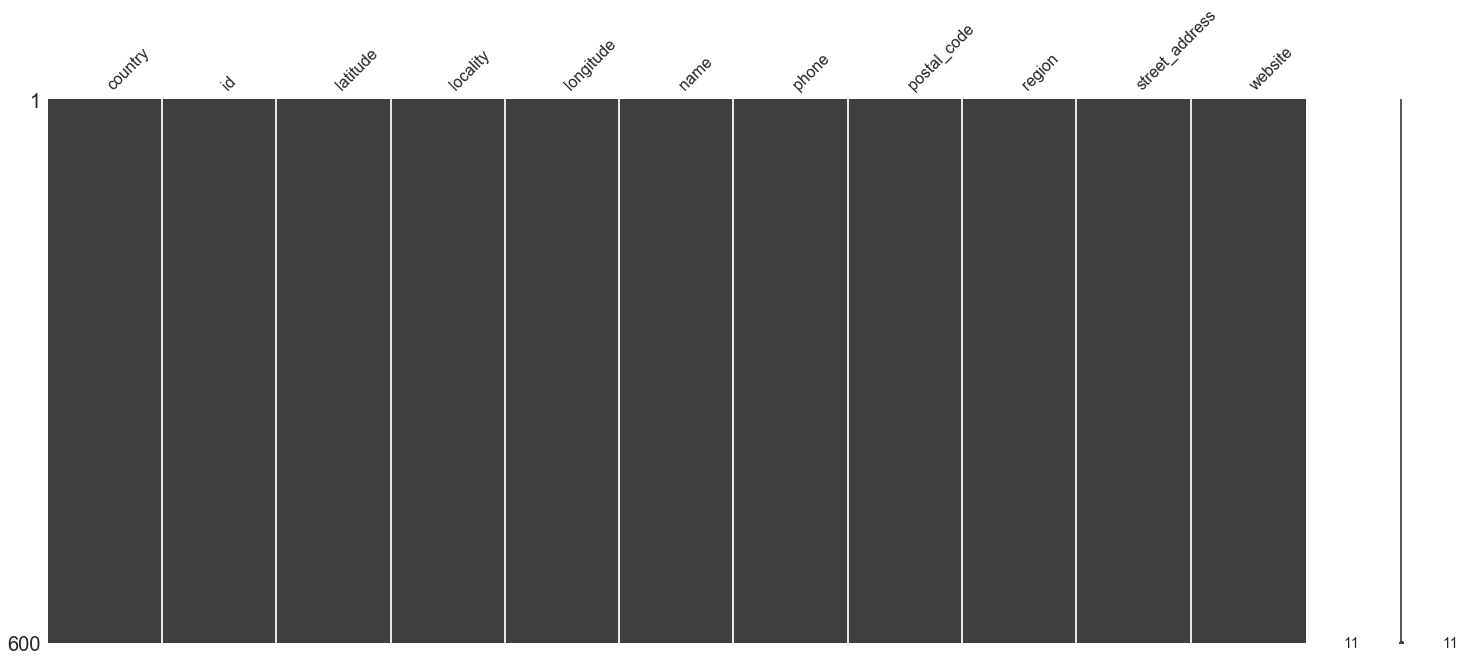

In [63]:
_ = msno.matrix(four_train)
_ = msno.matrix(locu_train)

In [66]:
indexer = recordlinkage.BlockIndex(on='postal_code')
pairs = indexer.index(four_train, locu_train)

print (len(four_train), len(locu_train), len(pairs))

600 600 16035


In [67]:
# For preprocessing: https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html
# For custom blockers: https://recordlinkage.readthedocs.io/en/latest/notebooks/custom_algorithms.html
# For multipler blockers: https://recordlinkage.readthedocs.io/en/latest/performance.html
# For ML algs: https://recordlinkage.readthedocs.io/en/latest/notebooks/classifiers.html

from recordlinkage.datasets import load_krebsregister

krebs_data, krebs_match = load_krebsregister(missing_values=0)
krebs_data.head()


Start downloading the data.
Data download succesfull.


,,cmp_firstname1,cmp_firstname2,cmp_lastname1,cmp_lastname2,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode
id1,id2,,,,,,,,,
22161,38467,1.000000,0.0,0.142857,0.0,1,0.0,1.0,0.0,0.0
38713,75352,0.000000,0.0,0.571429,0.0,1,0.0,0.0,0.0,0.0
13699,32825,0.166667,0.0,0.000000,0.0,0,1.0,1.0,1.0,0.0
22709,37682,0.285714,0.0,1.000000,0.0,1,0.0,0.0,0.0,0.0
2342,69060,0.250000,0.0,0.125000,0.0,1,1.0,1.0,1.0,0.0


In [71]:
golden_pairs = krebs_data[0:5000]
golden_matches_index = golden_pairs.index & krebs_match # 2093 matching pairs

golden_matches_index

MultiIndex(levels=[[14811, 17937, 20713, 22436, 23323, 23546, 28464, 28539, 29922, 31059, 32487, 33613, 34064, 34171, 34287, 35967, 40350, 46933, 49588, 69924, 75394, 79126, 88108, 89874], [14882, 23281, 27823, 27978, 34715, 43424, 46075, 46602, 47037, 48727, 61025, 63083, 64971, 69899, 71229, 71543, 72216, 74737, 81544, 83715, 84983, 89876, 92002, 94380]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 11, 9, 1, 2, 3, 13, 4, 6, 16, 10, 12, 5, 7, 18, 14, 19, 8, 15, 17, 22, 20, 23, 21]],
           names=['id1', 'id2'],
           sortorder=0)